#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('imdb_top_10000.txt', names =["imdbID", "title","year","score","vote","runtime", "genres"],delimiter = "\t")
df
# df.columns=["imdbID", "title","year","score","votes","runtime","genres"]

imdbID                            title  year  score    vote  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[10000 rows x 7 columns]

In [52]:
df.columns=["imdbID", "title","year","score","vote","runtime", "genres"]

In [53]:
df


imdbID                            title  year  score    vote  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

        runtime                            genres  
0     142 mins.                       Crime|Drama  
1     154 mins.                    Crime|Thriller  
2     139 mins.            Drama|Mystery|Thriller  
3     136 mins.           Action|Adventure|Sci-Fi  
4     148 mins.  Action|Adventure|Sci-Fi|Thriller  
...         ...                               ...  
9995   78 mins.                             Drama  
9996  100 mins.        Comedy|Drama|Music|Romance  
9997  104 mins.            Drama|Mystery|Thriller  
9998  179 mins.                   Musical|Romance  
9999   96 mins.                      Comedy|Drama  

[10000 rows x 7 columns]

In [54]:
df.shape

(10000, 7)

In [55]:
df.title.nunique()

9998

In [56]:
df.title.duplicated().any()

True

In [57]:
df.loc[df.title.duplicated(keep= False)]

imdbID               title  year  score  vote    runtime  \
4466  tt0275083  The Warrior (2001)  2001    7.4  6073  158 mins.   
7222  tt0425308        Noise (2007)  2007    6.2  2491   92 mins.   
9128  tt0809931        Noise (2007)  2007    6.7  1630  108 mins.   
9566  tt0295682  The Warrior (2001)  2001    6.7  1472   86 mins.   

                        genres  
4466  Action|Drama|History|War  
7222        Comedy|Crime|Drama  
9128            Drama|Thriller  
9566           Adventure|Drama

In [58]:
df.drop_duplicates(subset ="title", keep = False, inplace = True)

In [59]:
df.loc[df.title.duplicated(keep= False)]

Empty DataFrame
Columns: [imdbID, title, year, score, vote, runtime, genres]
Index: []

In [60]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
vote       0
runtime    0
genres     1
dtype: int64

In [61]:
df.dropna(subset =['genres'],inplace = True)

In [62]:
df.isnull().sum()

imdbID     0
title      0
year       0
score      0
vote       0
runtime    0
genres     0
dtype: int64

In [63]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
vote         int64
runtime     object
genres      object
dtype: object

In [64]:
df.head()
url=df.runtime[0]
url

'142 mins.'

In [65]:
runtime = url.split("mins.")[0]
runtime

'142 '

In [66]:
def get_runtime(url):
  runtime=url.split("mins.")[0]
  return runtime

df['runtime']=df.runtime.map(get_runtime)  

In [67]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
vote         int64
runtime     object
genres      object
dtype: object

In [68]:
df["runtime"]=pd.to_numeric(df.runtime, errors='coerce')

In [69]:
df

imdbID                            title  year  score    vote  \
0     tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479   
1     tt0110912              Pulp Fiction (1994)  1994    9.0  490065   
2     tt0137523                Fight Club (1999)  1999    8.8  458173   
3     tt0133093                The Matrix (1999)  1999    8.7  448114   
4     tt1375666                 Inception (2010)  2010    8.9  385149   
...         ...                              ...   ...    ...     ...   
9995  tt0807721                   Meduzot (2007)  2007    7.0    1357   
9996  tt0339642            Daltry Calhoun (2005)  2005    5.2    1357   
9997  tt0060880    The Quiller Memorandum (1966)  1966    6.5    1356   
9998  tt0152836                      Taal (1999)  1999    6.5    1356   
9999  tt0279977            The Navigators (2001)  2001    6.9    1356   

      runtime                            genres  
0         142                       Crime|Drama  
1         154                    Crime|Thriller  
2         139            Drama|Mystery|Thriller  
3         136           Action|Adventure|Sci-Fi  
4         148  Action|Adventure|Sci-Fi|Thriller  
...       ...                               ...  
9995       78                             Drama  
9996      100        Comedy|Drama|Music|Romance  
9997      104            Drama|Mystery|Thriller  
9998      179                   Musical|Romance  
9999       96                      Comedy|Drama  

[9995 rows x 7 columns]

In [70]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
vote         int64
runtime      int64
genres      object
dtype: object

In [71]:
df.head()
url=df.title[0]
url

'The Shawshank Redemption (1994)'

In [72]:
title = url.split("(")[0]
title

'The Shawshank Redemption '

In [73]:
def get_title(url):
  title=url.split("(")[0]
  return title

df['title']=df.title.map(get_title)  

In [74]:
df.head()

imdbID                      title  year  score    vote  runtime  \
0  tt0111161  The Shawshank Redemption   1994    9.2  619479      142   
1  tt0110912              Pulp Fiction   1994    9.0  490065      154   
2  tt0137523                Fight Club   1999    8.8  458173      139   
3  tt0133093                The Matrix   1999    8.7  448114      136   
4  tt1375666                 Inception   2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [75]:
genre_set = set()
for genre in df.genres:
  list_genre = genre.split("|")
  genre_set.update(list_genre)

len(genre_set)

24

In [76]:
for genre in genre_set:
  df[genre]= [genre in row.split("|") for row in df.genres]
df.head()  

imdbID                      title  year  score    vote  runtime  \
0  tt0111161  The Shawshank Redemption   1994    9.2  619479      142   
1  tt0110912              Pulp Fiction   1994    9.0  490065      154   
2  tt0137523                Fight Club   1999    8.8  458173      139   
3  tt0133093                The Matrix   1999    8.7  448114      136   
4  tt1375666                 Inception   2010    8.9  385149      148   

                             genres   News  Action  Family  ...  Animation  \
0                       Crime|Drama  False   False   False  ...      False   
1                    Crime|Thriller  False   False   False  ...      False   
2            Drama|Mystery|Thriller  False   False   False  ...      False   
3           Action|Adventure|Sci-Fi  False    True   False  ...      False   
4  Action|Adventure|Sci-Fi|Thriller  False    True   False  ...      False   

   Sci-Fi  Mystery  Musical  Reality-TV  Thriller  Music    War  Sport  Horror  
0   False    False    False       False     False  False  False  False   False  
1   False    False    False       False      True  False  False  False   False  
2   False     True    False       False      True  False  False  False   False  
3    True    False    False       False     False  False  False  False   False  
4    True    False    False       False      True  False  False  False   False  

[5 rows x 31 columns]

## 2. Asking Questions

2.1. does high vote means high score of movie?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

## 4. EDA

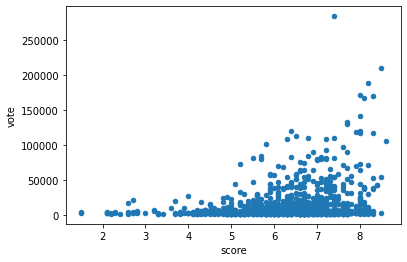

In [90]:
x='score'
y= 'vote'

d = df.sample(1000)[[x,y]]
d.plot(x=x,y=y, kind='scatter')

# from this graph we know that higher vote is directly propotional to vote

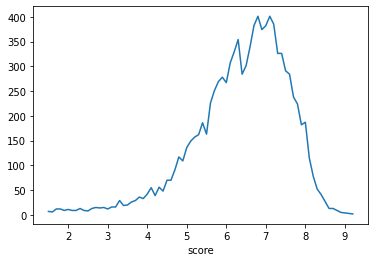

In [82]:
data=df.groupby(['score'])['title'].count()
data.plot()
# more than 350 movie has score 6 and 8

## 5. Determining Best Movies

In [88]:
# movies with high score are considered as best movies. lets see top 10 movies
highest = df.sort_values('score', ascending = False)
high = highest.loc[:,['title', 'score','year','runtime', 'genres' ]]
high.head(10)


title  score  year  runtime  \
0            The Shawshank Redemption     9.2  1994      142   
26                      The Godfather     9.2  1972      175   
1                        Pulp Fiction     9.0  1994      154   
3386                 Outrageous Class     9.0  1975       87   
37             The Godfather: Part II     9.0  1974      200   
85     The Good, the Bad and the Ugly     9.0  1966      161   
44    One Flew Over the Cuckoo's Nest     8.9  1975      133   
8                    Schindler's List     8.9  1993      195   
25                    The Dark Knight     8.9  2008      152   
143                      12 Angry Men     8.9  1957       96   

                           genres  
0                     Crime|Drama  
26                    Crime|Drama  
1                  Crime|Thriller  
3386                 Comedy|Drama  
37                    Crime|Drama  
85                        Western  
44                          Drama  
8     Biography|Drama|History|War  
25    Action|Crime|Drama|Thriller  
143                 Drama|Mystery

## 6. Trends in Popularity of Genres

In [79]:
genredf= df[list(genre_set)]
genredf.head()

News  Action  Family  Biography  Fantasy  Drama  Adult  Adventure  \
0  False   False   False      False    False   True  False      False   
1  False   False   False      False    False  False  False      False   
2  False   False   False      False    False   True  False      False   
3  False    True   False      False    False  False  False       True   
4  False    True   False      False    False  False  False       True   

   Romance  Western  ...  Animation  Sci-Fi  Mystery  Musical  Reality-TV  \
0    False    False  ...      False   False    False    False       False   
1    False    False  ...      False   False    False    False       False   
2    False    False  ...      False   False     True    False       False   
3    False    False  ...      False    True    False    False       False   
4    False    False  ...      False    True    False    False       False   

   Thriller  Music    War  Sport  Horror  
0     False  False  False  False   False  
1      True  False  False  False   False  
2      True  False  False  False   False  
3     False  False  False  False   False  
4      True  False  False  False   False  

[5 rows x 24 columns]

In [80]:
result=genredf.sum()
y= result.sort_values(ascending =False)[:10]
x= y.index

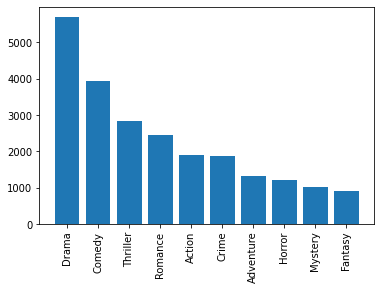

In [81]:
plt.bar(x,y)
plt.xticks(rotation =90)
plt.show()

